*Analysis of Superbowl halftime shows* 



In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#Load dataset into a dataframe
halftime_musicians = pd.read_csv('halftime_musicians_cleaned.csv')

#Inspect the first few rows of the dataframe
halftime_musicians.head()

,Super_Bowl,Musician,num_songs
0,59,SZA,2
1,59,Kendrick Lamar,12
2,58,Usher,13
3,58,Ludacris,1
4,58,H.E.R.,1


**Who has done the most halftime show appearances?**

In [19]:
#Count the number of halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('Musician').count()['Super_Bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('Super_Bowl', ascending=False)

#Display musicians who have appeared more than once
halftime_appearances[halftime_appearances['Super_Bowl'] > 1]
#print top 15 musicians with the most appearances
most_appearances = halftime_appearances.head(15)
print(most_appearances)


                                     Musician  Super_Bowl
6                                     Al Hirt           4
149                            Up with People           4
116         Southern University Marching Band           3
23                             Carol Channing           2
21                                 Bruno Mars           2
15                                    Beyoncé           2
46                             Gloria Estefan           2
47                 Grambling State University           2
90                                      Nelly           2
81                              Mary J. Blige           2
48   Grambling State University Marching Band           2
32                          Disney characters           2
146     University of Minnesota Marching Band           2
100                             Pete Fountain           2
150                                     Usher           2


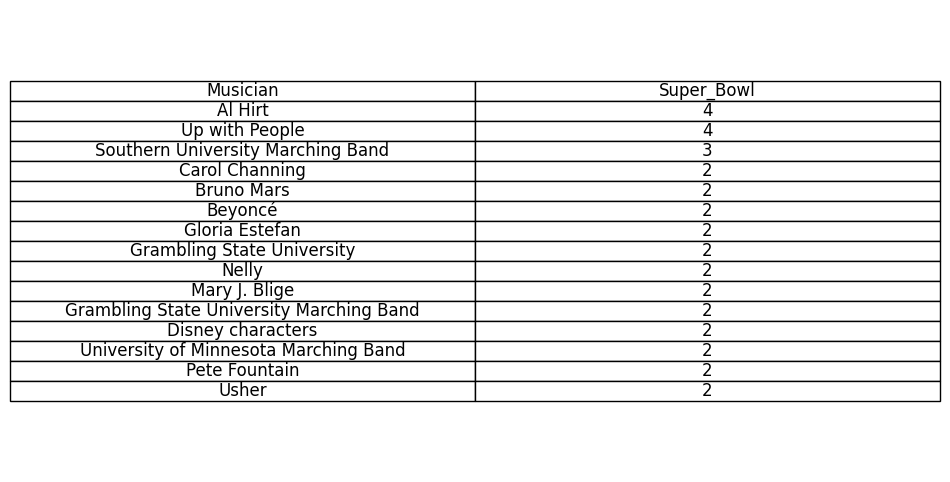

In [21]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide the axes
ax.axis('off')
ax.axis('tight')

# Create a table
table = ax.table(cellText=most_appearances.values, colLabels=most_appearances.columns, cellLoc='center', loc='center')

# Adjust the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Save the plot as a PNG image
plt.savefig('most_appearances.png', bbox_inches='tight')

# Show the plot
plt.show()

Looks like Al Hirt and the non-profit organisation Up with People have appeared the most.

## How many songs are usually performed by each musician in a set ?


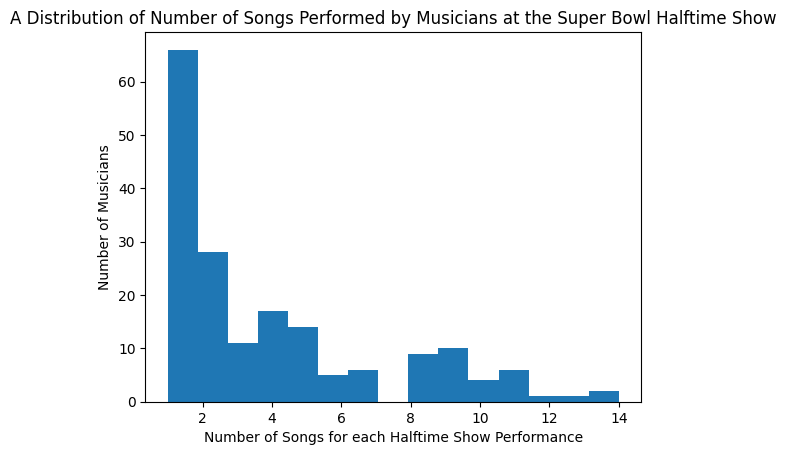

In [29]:
#Plot a histogram of number of songs for each halftime show
plt.hist(halftime_musicians.num_songs, bins=15)
plt.xlabel('Number of Songs for each Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.title('A Distribution of Number of Songs Performed by Musicians at the Super Bowl Halftime Show')
plt.show()


Most musicians are performing 1-4 songs in a performance I'm curious to find out who is performing the most songs

**Who has performed the most number of songs**


In [23]:
#Filter out 
halftime_songs = halftime_musicians.groupby('Musician').sum('num_songs').reset_index()

# Sort the DataFrame by 'num_songs' in descending order
halftime_songs = halftime_songs.sort_values('num_songs', ascending=False)
musician_most_songs = halftime_songs.head(15)


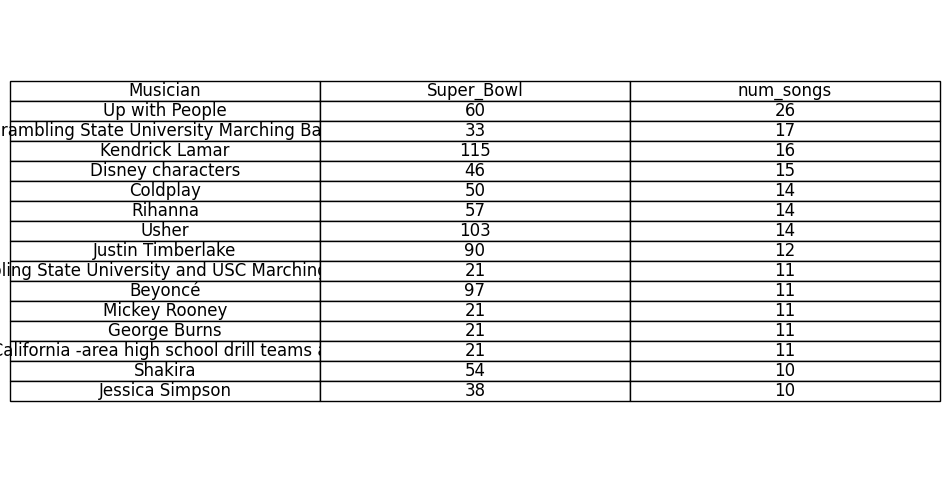

In [24]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide the axes
ax.axis('off')
ax.axis('tight')

# Create a table
table = ax.table(cellText=musician_most_songs.values, colLabels=musician_most_songs.columns, cellLoc='center', loc='center')

# Adjust the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Save the plot as a PNG image
plt.savefig('musician_most_songs.png', bbox_inches='tight')

# Show the plot
plt.show()

In [26]:


import plotly.express as px

# Use the existing halftime_songs DataFrame
df = halftime_songs

fig = px.scatter(df, y='num_songs', color='num_songs',
                 size='num_songs',  
                 hover_data=['Musician'],
                 title='Comparative Analysis of Number of Songs Performed by Musicians at the Super Bowl Halftime Show') 
  
fig.show()

In [27]:
#save fig as a HTML file
fig.write_html("num_songs_performed.html")
